## Import libraries


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
%matplotlib inline


### Customize

In [2]:
# Parameters for static EOQ
annual_demand = 10000
ordering_cost = 1200
holding_cost = 1250  

# Parameters for stochastic EOQ
n_simulations = 10000

# Input values of variation in decimal 
demand_fluctuation = 0.10
ordering_cost_fluctuation = 0.10
holding_cost_min = 1000
holding_cost_max= 1500
my_bin_size = 10

#save output
my_report="0601 Simulation_report.csv"
my_plot="0601 simulation_plot.png"

## Computation of Static EOQ

In [3]:
# Static EOQ Calculation
def calculate_eoq_static(D, S, H):
    return np.sqrt((2 * D * S) / H)

eoq_static = calculate_eoq_static(annual_demand, ordering_cost, holding_cost)
print(f"Static EOQ: {eoq_static:.2f} units")



Static EOQ: 138.56 units


## Simulation

In [4]:

# Simulate EOQ under stochastic conditions

# Assumed standard deviations
demand_variation = demand_fluctuation * annual_demand
ordering_cost_variation = ordering_cost_fluctuation * ordering_cost

# Simulations
np.random.seed(42)
demand_sim = np.random.normal(loc=annual_demand, scale=demand_variation, size=n_simulations)
ordering_cost_sim = np.random.normal(loc=ordering_cost, scale=ordering_cost_variation, size=n_simulations)
holding_cost_sim = np.random.uniform(low=holding_cost_min, high=holding_cost_max, size=n_simulations)

# Ensure no negative values
demand_sim = np.maximum(demand_sim, 1)
ordering_cost_sim = np.maximum(ordering_cost_sim, 1)
holding_cost_sim = np.maximum(holding_cost_sim, 1)



## Computation of Stochastic EOQ

In [5]:
# EOQ calculation
eoq_simulated = np.sqrt((2 * demand_sim * ordering_cost_sim) / holding_cost_sim)

# Summary statistics
eoq_summary = {
    '25th percentile': np.percentile(eoq_simulated, 25),
    '50th percentile (median)': np.percentile(eoq_simulated, 50),
    '75th percentile': np.percentile(eoq_simulated, 75),
    '95th percentile': np.percentile(eoq_simulated, 95),
    '99th percentile': np.percentile(eoq_simulated, 99)
}


In [6]:
### Save simulation report

In [7]:

simulated_eoq_values = []

for _ in range(n_simulations):
    D_sim = np.random.normal(annual_demand, annual_demand * demand_fluctuation)
    S_sim = np.random.normal(ordering_cost, ordering_cost * ordering_cost_fluctuation)
    H_sim = holding_cost  
    
    eoq = calculate_eoq_static(D_sim, S_sim, H_sim)
    
    simulated_eoq_values.append({
        "Simulated_Demand": D_sim,
        "Simulated_OrderingCost": S_sim,
        "HoldingCost": H_sim,
        "EOQ": eoq
    })

# Convert to DataFrame
df_simulation = pd.DataFrame(simulated_eoq_values)

# Save to CSV
df_simulation.to_csv(my_report, index=False)



## EOQ range output and Plotting

EOQ Reports

Static EOQ: 138.56 units

EOQ Summary Statistics (Stochastic):
25th percentile: 130.16 units
50th percentile (median): 138.69 units
75th percentile: 147.61 units
95th percentile: 161.24 units
99th percentile: 170.02 units


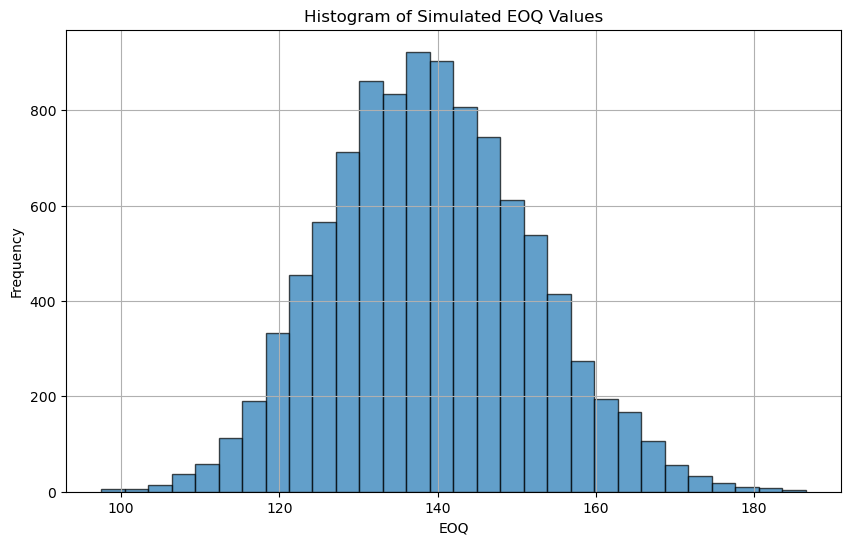


EOQ Frequency Distribution Table:
         EOQ Range  Frequency
 (97.379, 106.374]         24
(106.374, 115.281]        209
(115.281, 124.187]        978
(124.187, 133.094]       2140
  (133.094, 142.0]       2662
  (142.0, 150.907]       2163
(150.907, 159.813]       1227
 (159.813, 168.72]        470
 (168.72, 177.626]        108
(177.626, 186.533]         19


Outputs saved: 

Simulation results saved to: 0601 Simulation_report.csv
Histogram saved to: 0601 simulation_plot.png


In [8]:
# EOQ reporta
print("EOQ Reports\n")
# print static EOQ
print(f"Static EOQ: {eoq_static:.2f} units")

# print stochastoc EOQ
print("\nEOQ Summary Statistics (Stochastic):")
for key, value in eoq_summary.items():
    print(f"{key}: {value:.2f} units")

# Histogram
plt.figure(figsize=(10, 6))
plt.hist(eoq_simulated, bins=30, edgecolor='black', alpha=0.7)
plt.title("Histogram of Simulated EOQ Values")
plt.xlabel("EOQ")
plt.ylabel("Frequency")
plt.grid(True)
plt.savefig(my_plot)
plt.show()

# Frequency distribution table
eoq_bins = pd.cut(eoq_simulated, bins=my_bin_size)
freq_table = pd.Series(eoq_bins).value_counts().sort_index().reset_index()
freq_table.columns = ['EOQ Range', 'Frequency']

# Display table
print("\nEOQ Frequency Distribution Table:")
print(freq_table.to_string(index=False))

#File save status
print("\n")
print("Outputs saved: \n")
print(f"Simulation results saved to: {my_report}")
print(f"Histogram saved to: {my_plot}")